<a href="https://colab.research.google.com/github/CaptaiN785/DL-Notebooks/blob/main/fashion_mnist/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow import one_hot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

In [7]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

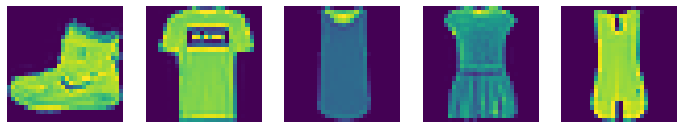

In [22]:
plt.figure(figsize=(12, 6))
for i, image in enumerate(X_train[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.xlabel(y_train[i])
    plt.axis('off')
plt.show()

In [23]:
## There are 10 category of image 

In [27]:
## Before designing the model let's first convert into 1 chanel of image

X_train = X_train.reshape((-1, X_train[0].shape[0], X_train[0].shape[1], 1))

X_test = X_test.reshape((-1, X_test[0].shape[0], X_test[0].shape[1], 1))

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [47]:
y_train = one_hot(y_train, 10)
y_test = one_hot(y_test, 10)

In [51]:
y_train.shape, y_test.shape

(TensorShape([60000, 10]), TensorShape([10000, 10]))

In [71]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), input_shape=X_train[0].shape, activation = 'relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding = 'same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding = 'same'),
    layers.Conv2D(512, (3, 3), activation='relu', padding = 'same'),
    layers.Dropout(0.3),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 conv2d_44 (Conv2D)          (None, 28, 28, 128)       147584    
                                                                 
 dropout_16 (Dropout)        (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 14, 14, 128)       147584    
                                                     

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001, beta_1 = 0.95)

model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting the data into model
history = model.fit(X_train, y_train, batch_size=64, epochs=30, validation_split = 0.2)

Epoch 1/30
750/750 [==============================] - 168s 50ms/step - loss: 0.5831 - accuracy: 0.7990 - val_loss: 0.4013 - val_accuracy: 0.8756
Epoch 2/30
750/750 [==============================] - 41s 55ms/step - loss: 0.3260 - accuracy: 0.8806 - val_loss: 0.3630 - val_accuracy: 0.9003
Epoch 3/30
750/750 [==============================] - 39s 53ms/step - loss: 0.2677 - accuracy: 0.9029 - val_loss: 0.2708 - val_accuracy: 0.9133
Epoch 4/30
750/750 [==============================] - 39s 52ms/step - loss: 0.2337 - accuracy: 0.9140 - val_loss: 0.2830 - val_accuracy: 0.9051
Epoch 5/30
750/750 [==============================] - 39s 52ms/step - loss: 0.2040 - accuracy: 0.9262 - val_loss: 0.2880 - val_accuracy: 0.9096
Epoch 6/30
750/750 [==============================] - 40s 53ms/step - loss: 0.1826 - accuracy: 0.9356 - val_loss: 0.2409 - val_accuracy: 0.9212
Epoch 7/30
750/750 [==============================] - 41s 55ms/step - loss: 0.1625 - accuracy: 0.9403 - val_loss: 0.2194 - val_accuracy